<a href="https://colab.research.google.com/github/Khumayun/HDDA_final/blob/master/result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final
In this assignment you have difficult case when number of samples not bigger than number of dimensions. Here you should build classifier using train dataset, while test dataset is hidden. You can use any classifier from sklearn and transform features in any way too.

Grading:
 - accuracy < 0.3 - no more than 5 pts
 - accuracy <= 0.35 - no more than 10 pts
 - accuracy <= 0.4 - no more than 15 pts
 - TOP 10 results - 30 points (maximum), others weighted amount of points between 30 and 20 points for those who get more than 0.40 according to difference between their score and worst score of TOP 10
 - accuracy >= 0.5 - at least 25 pts
 - accuracy >= 0.6 - at least 30 pts
 

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
X = np.loadtxt('X_train')
y = np.loadtxt('y_train', dtype=np.int)

X.shape, y.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


((3072, 3072), (3072,))

### Train part
- implement feature transformation procedure in the function `transform_X(X)` if it is nedeed
- you can use any classifier, just try to find good hyperparameters, name your result classifier `clf`
- on the submition should be only 1 classifier in other case i can choose worst one

don't forget about danger of overfitting to train data

HERE baseline solution with SVM and with feature transformation that doesn't change anything

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
def transform_X(X, y):
    ## YOUR CODE FOR FEATURE TRANSFORMATION HERE
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = transform_X(X, y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
## I WANT TO MAKE A SYNTHETIC DATA BASED ON GIVEN, FOR TRAIN AND VALIDATION PURPOSES

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

In [ ]:
X_train = np.loadtxt('X_train')
y_train = np.loadtxt('y_train')
data = pd.DataFrame(data=X_train, columns=[x for x in range(3072)])
data['outcome'] = y_train

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))
    
    return X, y

# generate n real samples with class labels; We randomly select n samples from the real data
def generate_real_samples(n):
    X = data.sample(n)
    y = np.ones((n, 1))
    return X, y

def define_generator(latent_dim, n_outputs=10):
    model = Sequential()
    model.add(Dense(15, activation='relu',  kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [ ]:
def define_discriminator(n_inputs=10):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [ ]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
    # plot loss
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='d')
    plt.plot(g_hist, label='gen')
    plt.show()
    plt.close()

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=1000, n_batch=128, n_eval=200):
  # determine half the size of one batch, for updating the  discriminator
  half_batch = int(n_batch / 2)
  d_history = []
  g_history = []
  # manually enumerate epochs
  for epoch in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
    d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    # update the generator via the discriminator's error
    g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)
    #         print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
    d_history.append(d_loss)
    g_history.append(g_loss_fake)
    #     g_model.save('trained_generated_model.h5')
  plot_history(d_history, g_history)
  return g_model

In [ ]:
from numpy.random import randn
import matplotlib.pyplot as plt

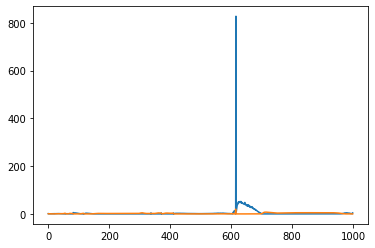

In [ ]:
# size of the latent space
latent_dim = 3073
# create the discriminator
discriminator = define_discriminator(3073)
# create the generator
generator = define_generator(latent_dim, 3073)
# create the gan
gan_model = define_gan(generator, discriminator)
# # train model
model = train(generator, discriminator, gan_model, latent_dim)

In [ ]:
latent_points = generate_latent_points(3073, 750)
X_faked = model.predict(latent_points)

In [ ]:
data_fake = pd.DataFrame(data=X_faked,  columns=[x for x in range(3072)]+['outcome'])
data_fake['outcome'] = data_fake['outcome'].astype(int)
y = data_fake['outcome']

In [ ]:
data_fake.drop('outcome', axis=1, inplace=True)

In [ ]:
from numpy.random import randn
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = transform_X(data_fake, y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

In [ ]:
## compare multiple classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=1),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

# COMPARE CLASSIFIERS
accuracies = []
scoring = ['precision_macro']
for clf in classifiers:
    # clf.fit(X_train_transformed, y_train)
    scores = cross_validate(clf, X_train_transformed, y_train, scoring=scoring)
    accuracies.append(np.max(list(scores['test_precision_macro'])))
#     clf_y_pred = clf.predict(X_test)
#     accuracies.append(accuracy_score(y_test, clf_y_pred))

# SELECT BEST CLASSIFIER
clf = classifiers[np.argmax(accuracies)]
clf

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

AdaBoostClassifier()

In [ ]:
accuracies

[0.961111111111111,
 0.9916666666666668,
 0.10222222222222221,
 0.4023529411764706,
 0.9877551020408163,
 0.9747965589397815,
 0.9393939393939394,
 0.9957446808510639,
 0.9136067997043608,
 0.10337078651685394]

### Test part, don't change anything here

Here is used your `clf` trained before, at your folder **Test** and **Train** datasets are the same, but during grading differen **Test** dataset will be used

In [ ]:
X_test = np.loadtxt('X_test')
y_test = np.loadtxt('y_test', dtype=np.int)

In [ ]:
y_pred = clf.predict(transform_X(X_test))
accuracy_score(y_test, y_pred)